### Student Information
Name: 何承恩

Student ID: 114062554

GitHub ID: leo66ho

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

## Load needed libraries
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
import sklearn.datasets
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import plotly.express as px
import math
# If you get "ModuleNotFoundError: No module named 'PAMI'"
# run the following in a new Jupyter cell:
# !pip3 install PAMI
import PAMI
import umap

import helpers.data_mining_helpers as dmh


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leoho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
## Convert reddit dataset to pandas dataframe
reddit_dataset = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
reddit_dataset = pd.DataFrame.from_records(reddit_dataset, columns=['title', 'upvotes', 'text', 'subjectivity', 'sentiment', 'polarity', 'entities', 'label'])
reddit_dataset

C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\57475715.py:3: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  reddit_dataset = pd.DataFrame.from_records(reddit_dataset, columns=['title', 'upvotes', 'text', 'subjectivity', 'sentiment', 'polarity', 'entities', 'label'])


,title,upvotes,text,subjectivity,sentiment,polarity,entities,label
0,Retardation is on the menu boys! WSB is so back,0.0,Calls on retards,1,-1,-0.9,[],-1
1,Retail giant TARGET has now declined for 10 co...,-15.0,Stunt as in like why did they even make a big ...,0.177777778,1,0.083333333,"['Stunt', 'company', 'deal', 'place']",0
2,How do you feel about a sitting president maki...,1.0,Seeing lots of red in the ticker.,0,0,0,['ticker'],0
3,Who knows more? $VMAR,30.0,Vision Marine Technologies Inc. is rewriting t...,0.646969697,1,0.216382576,"['watercraft', 'skill', 'power', ']', 'feat', ...",1
4,The Trump administration is begging Xi Jinping...,1.0,He didn? say thank you.,0,0,0,[],-1
...,...,...,...,...,...,...,...,...
842,$MRIN Marin Software killed it today. Hope som...,1.0,Invest now it is going to shoot up tomorrow,0,0,0,['tomorrow'],1
843,$ U.S. dollar value (crashing),2.0,Where can I read this?,0,0,0,[],0
844,Analyst Recommendations,1.0,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0,0,0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0
845,Weekend Discussion Thread for the Weekend of A...,10.0,i sold my puts so i expect cheeto to declare w...,0,0,0,"['war', 'denmark', 'cheeto', 'i']",-1


In [3]:
## Check missing values
reddit_dataset.isnull().apply(lambda x: dmh.check_missing_values(x))
## Check duplicate values
reddit_dataset.duplicated().sum()
reddit_dataset.drop_duplicates(keep=False, inplace=True)


In [4]:
# Check and remove any rows with invalid data format
reddit_dataset['polarity'] = pd.to_numeric(reddit_dataset['polarity'],errors='coerce')
reddit_dataset['subjectivity'] = pd.to_numeric(reddit_dataset['subjectivity'],errors='coerce')
reddit_dataset['sentiment'] = pd.to_numeric(reddit_dataset['sentiment'],errors='coerce')

reddit_dataset.dropna(inplace=True)
reddit_dataset.isnull().apply(lambda x: dmh.check_missing_values(x))

## Sample 200 records from reddit_dataset
reddit_sample = reddit_dataset.sample(n=200, random_state=42)

In [5]:
## Return reddit data with label 1/-1 only for reddit_positive/_negative
reddit_positive = reddit_dataset[lambda x: x['label'].isin(['1'])]
print(reddit_positive.shape)
reddit_negative = reddit_dataset[lambda x: x['label'].isin(['-1'])]
print(reddit_negative.shape)


(108, 8)
(315, 8)


In [6]:
## Learn and return document-term matrix and frequency plot(function form)
from nltk.corpus import stopwords
nltk.download('stopwords')

def get_freq_plt(df,df_name):
    title_vectorizer = CountVectorizer()
    text_vectorizer = CountVectorizer()
    dtm_title = title_vectorizer.fit_transform(df['title'])
    dtm_text = text_vectorizer.fit_transform(df['text'])

    ## Remove stop words using analyzers
    title_analyzer = title_vectorizer.build_analyzer()
    text_analyzer = text_vectorizer.build_analyzer()
    df['title_tokens'] = df['title'].apply(lambda x: title_analyzer(x))
    df['text_tokens'] = df['text'].apply(lambda x: text_analyzer(x))

    ## Compute term frequencies
    dtm_title_freq = dtm_title.toarray().sum(axis=0)
    dtm_text_freq = dtm_text.toarray().sum(axis=0)

    ## Use plotly to visualize the term frequencies from most to least
    ## For titles
    stop_words = set(stopwords.words('english'))
    filtered_term = []
    filtered_freq = []
    for i in range(title_vectorizer.get_feature_names_out().shape[0]):
        if dtm_title_freq[i] > 10 and title_vectorizer.get_feature_names_out()[i] not in stop_words and title_vectorizer.get_feature_names_out()[i].isalpha():
            filtered_term.append(title_vectorizer.get_feature_names_out()[i])
            filtered_freq.append(dtm_title_freq[i])


    sorted_indices = np.argsort(filtered_freq)[::-1]
    filtered_term_np = np.array(filtered_term)
    filtered_freq_np = np.array(filtered_freq)
    sorted_terms = filtered_term_np[sorted_indices]
    sorted_freqs = filtered_freq_np[sorted_indices]
    fig = py.express.bar(x=sorted_terms, y=sorted_freqs)
    fig.update_layout(title_text=df_name+'-Titles', xaxis_title='Terms', yaxis_title='Frequencies', xaxis_tickangle=90)
    fig.show()

    filtered_term = []
    filtered_freq = []

    ## For texts
    for i in range(text_vectorizer.get_feature_names_out().shape[0]):
        if dtm_text_freq[i] > 5 and text_vectorizer.get_feature_names_out()[i] not in stop_words and text_vectorizer.get_feature_names_out()[i].isalpha():
            filtered_term.append(text_vectorizer.get_feature_names_out()[i])
            filtered_freq.append(dtm_text_freq[i])


    sorted_indices = np.argsort(filtered_freq)[::-1]
    filtered_term_np = np.array(filtered_term)
    filtered_freq_np = np.array(filtered_freq)
    sorted_terms = filtered_term_np[sorted_indices]
    sorted_freqs = filtered_freq_np[sorted_indices]
    fig = py.express.bar(x=sorted_terms, y=sorted_freqs, color_discrete_sequence=['green'])
    fig.update_layout(title_text=df_name+'-Texts', xaxis_title='Terms', yaxis_title='Frequencies', xaxis_tickangle=90)
    fig.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leoho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
get_freq_plt(reddit_sample, 'Term frequencies in reddit_sample')


In [8]:
get_freq_plt(reddit_positive, 'Term frequencies in reddit_positive')


C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\2599223371.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\2599223371.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [9]:
get_freq_plt(reddit_negative, 'Term frequencies in reddit_negative')

C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\2599223371.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\2599223371.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [10]:
# Visualize polarity and label on 2-axis scatter plot

fig = px.scatter(reddit_dataset, y='polarity', x='label', title='Polarity vs Label')
fig.show()

# Phase 2

In [11]:
reddit_dataset[:9]

,title,upvotes,text,subjectivity,sentiment,polarity,entities,label
0,Retardation is on the menu boys! WSB is so back,0.0,Calls on retards,1.000000,-1.0,-0.900000,[],-1
1,Retail giant TARGET has now declined for 10 co...,-15.0,Stunt as in like why did they even make a big ...,0.177778,1.0,0.083333,"['Stunt', 'company', 'deal', 'place']",0
2,How do you feel about a sitting president maki...,1.0,Seeing lots of red in the ticker.,0.000000,0.0,0.000000,['ticker'],0
3,Who knows more? $VMAR,30.0,Vision Marine Technologies Inc. is rewriting t...,0.646970,1.0,0.216383,"['watercraft', 'skill', 'power', ']', 'feat', ...",1
4,The Trump administration is begging Xi Jinping...,1.0,He didn? say thank you.,0.000000,0.0,0.000000,[],-1
5,Weekend Discussion Thread for the Weekend of A...,16.0,"Hoping to ejaculate in wet warm puss tonight, ...",0.500000,1.0,0.250000,"['tonight', 'puss']",0
6,Is the market in complete denial right now?,5.0,Trump will respond to china increasing their t...,0.380000,-1.0,-0.108333,"['JPow', 'Jerome', 'i', 'reporting', 'Trump', ...",-1
7,Retardation is on the menu boys! WSB is so back,-3.0,Confirmed not a trap. Its been like this for p...,0.700000,1.0,0.050000,"['Confirmed', 'mouth', 'word', 'trap']",0
8,"It's fucking awful seeing the ""Silver"" misinfo...",1.0,Am I the only one seeing the cup & handle brea...,0.491818,1.0,0.057045,"['cup', 'Day', 'handle', 'pivot', 'Green', 'tr...",1


### 5.4.2 Finding Frequent Patterns

In [12]:
# Merge title and text columns into 'content'
reddit_dataset['combined'] = reddit_dataset['title'].fillna('') + ' ' + reddit_dataset['text'].fillna('')

In [13]:
### Begin Assignment Here

## Finding frequent patterns in text

from sklearn.feature_extraction.text import CountVectorizer

#Create separate DataFrames for each label
labels = reddit_dataset['label'].unique()
label_dfs = {} 

for label in labels:
    # Filter the original DataFrame by category
    label_dfs[label] = reddit_dataset[reddit_dataset['label'] == label].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['combined'])  # Transform the text data into word counts(try to merge title and text)
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for label in labels:
    filt_term_document_dfs[label] = create_term_document_df(label_dfs[label])




In [14]:
#Checkpoint: filt_term_document_dfs for each label

display(filt_term_document_dfs['1'].head())
display(filt_term_document_dfs['0'].head())
display(filt_term_document_dfs['-1'].head())

,04,06,10,100,11,116,12,125,14,145,...,yes,yesterday,yields,yikes,yolo,yoshitsu,you,your,ytd,zero
0,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,00,000,01378,027,08,10,100,100k,100x,10k,...,you,young,your,yours,yourself,yoyo,yup,zgld,zone,zsil
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,000,02,03,08,10,100,1000,10000,11,12,...,years,yet,yields,yippee,yo,you,your,yourselves,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Analyze term frequencies for the most and least frequent terms in selected label
import matplotlib.pyplot as plt


def tf_analyzer(label_number):
    word_counts = filt_term_document_dfs[str(label)].sum(axis=0).to_numpy()

# Sort the term frequencies in descending order
    sorted_indices = np.argsort(word_counts)[::-1]  # Get indices of sorted frequencies
    sorted_counts = np.sort(word_counts)[::-1]  # Sort frequencies in descending order

    # Visualize the frequency distribution
    plt.figure(figsize=(10, 6))
    plt.hist(word_counts, bins=5000, color='blue', edgecolor='black')
    plt.title(f'Term Frequency Distribution for Category {label_number}')
    plt.xlabel('Frequency')
    plt.ylabel('Number of Terms')
    plt.xlim(1,200)
    plt.ylim(1,200)
    plt.show()
    

# Calculate the index corresponding to the top 5%/ bottom 20%
    total_terms = len(sorted_counts)
    top_percent_index = int(0.05 * total_terms)
    bottom_percent_index = total_terms-int(0.2 * total_terms)

# Get the indices of the top 5%/bottom 20% most frequent terms
    top_percent_indices = sorted_indices[:top_percent_index]
    bottom_percent_indices = sorted_indices[bottom_percent_index:]

# Filter terms that belong to the top 5%/bottom 20% based on their rank
    filtered_words_top = [filt_term_document_dfs[str(label_number)].iloc[:, i].name for i in top_percent_indices]
    filtered_words_bottom = [filt_term_document_dfs[str(label_number)].iloc[:, i].name for i in bottom_percent_indices]

#Checkpoint: filtered_words_top/_bottom

    print(f"Category: {str(label_number)}")
    print(f"Number of terms in top 2%: {top_percent_index}")
    print(f"Filtered terms: {filtered_words_top}")

    print(f"Category: {str(label_number)}")
    print(f"Number of terms in bottom 20%: {total_terms-bottom_percent_index}")
    print(f"Filtered terms: {filtered_words_bottom}")
    print("-----------------------------------------------------------")


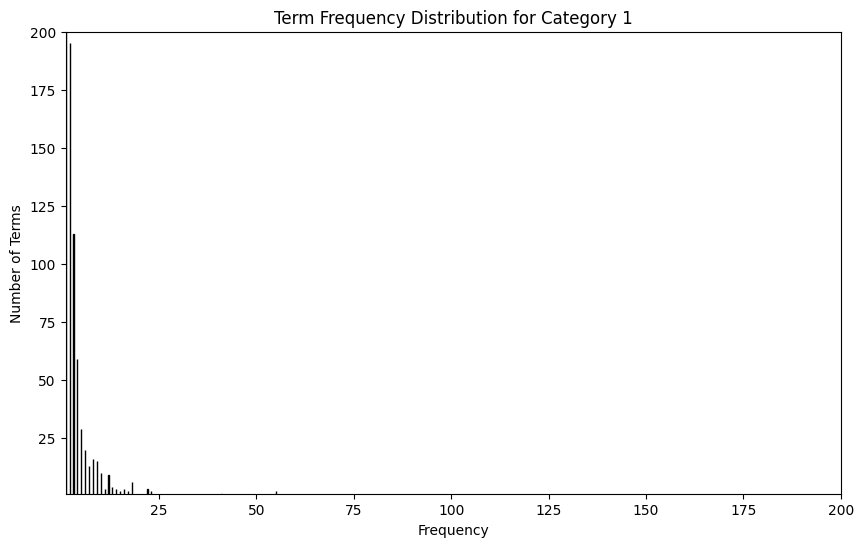

Category: 1
Number of terms in top 2%: 66
Filtered terms: ['the', 'and', 'to', 'is', 'for', 'in', 'it', 'on', 'of', 'with', 'this', 'you', 'trump', 'that', '2025', 'just', 'stocks', 'are', 'now', 'but', 'thread', 'weekend', 'my', 'they', 'silver', '11', 'discussion', 'be', 'good', 'more', 'so', 'if', 'can', 'at', 'have', 'us', 'all', 'from', 'market', 'we', 'up', 'doing', 'some', 'about', 'technology', 'one', 'their', 'star', 'into', 'by', 'has', 'anyone', 'policy', 'seeing', 'going', 'he', 'look', 'april', 'china', 'data', 'like', 'lithium', 'think', 'our', 'right', 'was']
Category: 1
Number of terms in bottom 20%: 267
Filtered terms: ['corporate', 'counter', 'covered', 'crayon', 'creating', 'crisis', 'crm', 'crucial', 'crushed', 'crypto', 'culture', 'schd', 'recession', 'reciyclical', 'reckon', 'records', 'red', 'reduce', 'refreshing', 'reinvested', 'computes', 'concentrate', 'confidence', 'congress', 'consequences', 'consumer', 'continually', 'click', 'climbers', 'clinics', 'closely

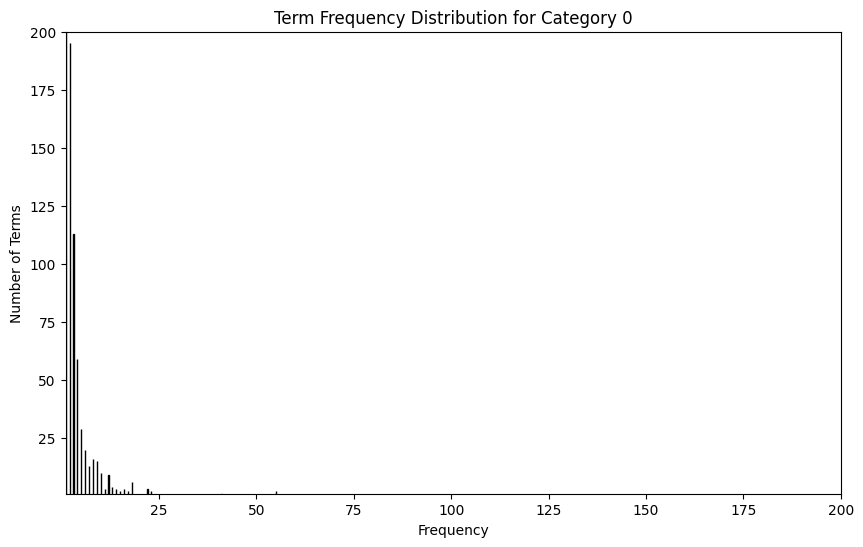

Category: 0
Number of terms in top 2%: 66
Filtered terms: ['guys', '6969', 'have', 'counterargument', 'cartman', 'conservatives', 'court', 'eastwood', 'earings', 'importance', 'handle', 'info', 'helps', 'guy', '150', 'create', 'german', 'ability', 'dumpster', 'analytics', 'happened', 'hypothetical', 'doubling', 'hah', 'froze', '08', 'biases', 'advertisements', 'circle', 'dogeusd', 'future', 'congressional', 'annually', 'accretive', 'coast', 'history', '47', 'center', 'design', 'hype', 'himself', 'bit', 'gambit', '25', 'grows', 'eat', 'gyina', 'generated', 'costco', 'angeles', 'cnbc', '80', 'est', 'for', 'christmas', 'coin', 'decide', 'aal', 'arch', 'be', 'damn', 'days', 'halted', 'either', 'few', 'https']
Category: 0
Number of terms in bottom 20%: 267
Filtered terms: ['available', 'aware', 'baba', 'backtracking', 'badass', 'bagger', 'bagging', 'ballistc', 'bang', 'banging', 'banned', 'fluids', 'factory', 'fafillion', 'failing', 'fairly', 'fall', 'fami', 'family', 'fans', 'ath', 'attack

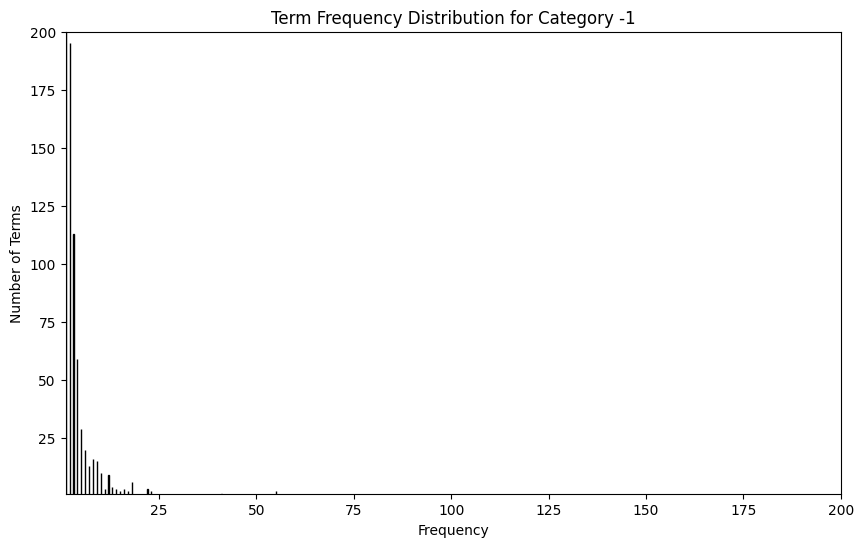

Category: -1
Number of terms in top 2%: 66
Filtered terms: ['laws', 'advised', 'lifetimes', 'earlier', 'couldn', 'don', 'eaten', 'fucked', 'frantically', 'misinformation', 'left', 'my', 'lololol', 'law', '18', 'edge', 'iq', 'airo', 'forever', 'based', 'less', 'mentality', 'flavoraid', 'learn', 'india', '10', 'certain', 'anything', 'dead', 'finance', 'insane', 'does', 'bed', 'also', 'dem', 'loyal', 'actions', 'crashed', 'fair', 'memes', 'lots', 'chaos', 'instead', '31', 'last', 'fucking', 'lcid', 'investment', 'dumbfuck', 'battle', 'deliver', 'after', 'government', 'ignorant', 'days', 'democrats', 'eu', 'ahead', 'biggest', 'cadres', 'engineered', 'entirely', 'led', 'gains', 'holy', 'mc']
Category: -1
Number of terms in bottom 20%: 267
Filtered terms: ['breakeven', 'bridging', 'broke', 'brrrrrr', 'bs', 'btw', 'bucko', 'build', 'bulletproof', 'bullshit', 'burgeoning', 'ideally', 'healthcare', 'hear', 'hearsay', 'hedgies', 'heed', 'helbent', 'hell', 'hello', 'boomers', 'boost', 'borderline

In [16]:
tf_analyzer(1)
tf_analyzer(0)
tf_analyzer(-1)

In [17]:
# Filter the bottom 20% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent, bottom_percent):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)

    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 2% and bottom 20%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    print(words_to_remove)
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

#Checkpoint: term_document_dfs
for label in labels:
    #print(f'\nFor label {label} we filter the following words:')
    term_document_dfs[str(label)] = filter_top_bottom_words_by_sum(filt_term_document_dfs[str(label)], 0.05, 0.2)

    display(term_document_dfs[str(label)])


Bottom 20.0% words: 
150             1
x200b           1
podcast         1
xpert           1
xrtx            1
               ..
conquer         1
cons            1
sighted         1
consequence     1
consequences    1
Length: 458, dtype: int64
Top 5.0% words: 
crashing     21
than         21
right        21
would        21
from         21
           ... 
trump       201
and         222
is          257
to          337
the         560
Length: 114, dtype: int64
Index(['150', 'x200b', 'podcast', 'xpert', 'xrtx', 'ya', 'yamana', 'yea',
       'poison', 'poked',
       ...
       'on', 'for', 'it', 'in', 'of', 'trump', 'and', 'is', 'to', 'the'],
      dtype='object', length=572)


,000,100,12,13,14,145,15,16,160,17,...,yeah,year,years,yet,yields,yippee,yo,your,youtube,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,0,0,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
311,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
312,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
313,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bottom 20.0% words: 
skt             1
wulf            1
wutang          1
yahoo           1
yall            1
               ..
consequences    1
conservative    1
communities     1
community       1
compact         1
Length: 567, dtype: int64
Top 5.0% words: 
new          18
breaking     18
jerome       18
don          18
think        19
           ... 
of          178
is          204
and         210
to          340
the         489
Length: 141, dtype: int64
Index(['skt', 'wulf', 'wutang', 'yahoo', 'yall', 'yamana', '22rate', 'zsil',
       '12855584', '140',
       ...
       'trump', 'on', 'for', 'it', 'in', 'of', 'is', 'and', 'to', 'the'],
      dtype='object', length=708)


,00,000,01378,027,08,100,100k,100x,10k,10ks,...,yesterday,yet,yield,yields,young,yours,yourself,yoyo,yup,zgld
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
382,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
383,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
384,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Bottom 20.0% words: 
worse        1
28           1
25           1
24           1
235          1
            ..
creating     1
crayon       1
covered      1
counter      1
corporate    1
Length: 267, dtype: int64
Top 5.0% words: 
was          9
right        9
our          9
think        9
lithium      9
          ... 
for         55
is          75
to          83
and         89
the        157
Length: 66, dtype: int64
Index(['worse', '28', '25', '24', '235', '22', 'yolo', 'ytd', 'yoshitsu',
       'try',
       ...
       'with', 'of', 'on', 'it', 'in', 'for', 'is', 'to', 'and', 'the'],
      dtype='object', length=333)


,04,10,100,116,12,125,14,145,16,1728,...,yeah,year,years,yelling,yes,yesterday,yields,yikes,your,zero
0,0,0,0,3,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
!pip3 install PAMI

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


In [19]:
import builtins

_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith('.csv'):
        kwargs['encoding'] = 'latin-1'   # Force Latin-1
        kwargs['errors'] = 'ignore'      # Ignore bad characters
    return _orig_open(*args, **kwargs)


builtins.open = safe_open

In [20]:
# Convert dataframe into transactional database

from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for label in term_document_dfs:
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[label])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{label}.csv', '>=', 1)

Database size (total no of transactions) : 108
Number of items : 1003
Minimum Transaction Size : 2
Average Transaction Size : 16.712962962962962
Maximum Transaction Size : 86
Standard Deviation Transaction Size : 14.376582634892324
Variance in Transaction Sizes : 208.61777431637245
Sparsity : 0.9833370259591595


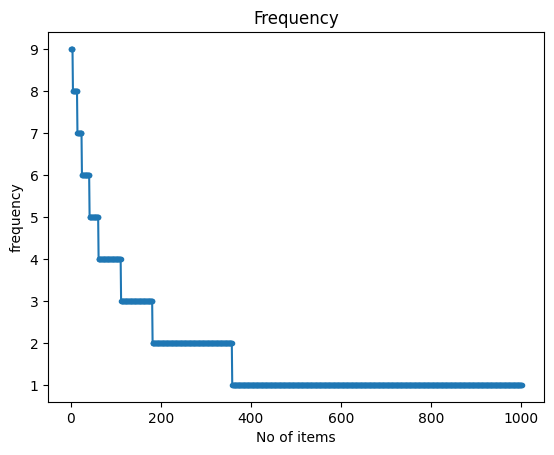

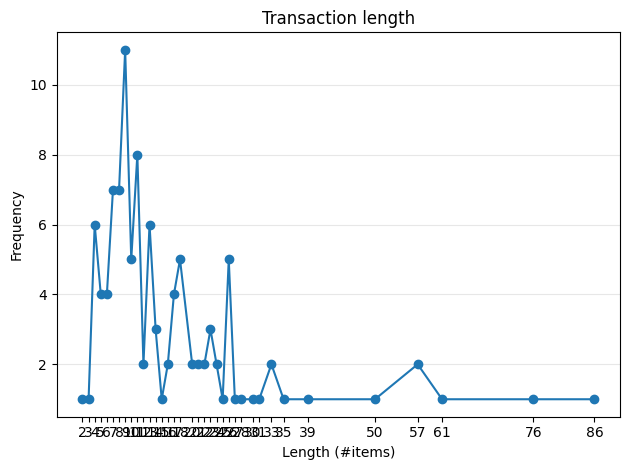

In [21]:
#Plot and the frequent patterns for each label

from PAMI.frequentPattern.basic import FPGrowth as alg
from PAMI.extras.dbStats import TransactionalDatabase as tds

obj1 = tds.TransactionalDatabase('td_freq_db_1.csv')
obj1.run()
obj1.printStats()
obj1.plotGraphs()

In [22]:
#Mine and store the frequent patterns for label 1
obj1 = alg.FPGrowth(iFile='td_freq_db_1.csv', minSup=5)
obj1.mine()
frequentPatternsDF_1= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_1))) #print the total number of patterns
print('Runtime: ' + str(obj1.getRuntime())) #measure the runtime
obj1.save('freq_patterns_1.txt')
display(frequentPatternsDF_1)


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 106
Runtime: 0.0030755996704101562


,Patterns,Support
0,years,5
1,please,5
2,dollar,5
3,no,5
4,its,5
...,...,...
101,awful\tcampaign\teverywhere\tmisinformation,9
102,awful\tcampaign\tfucking\tmisinformation,9
103,awful\teverywhere\tfucking\tmisinformation,9
104,campaign\teverywhere\tfucking\tmisinformation,9


Database size (total no of transactions) : 383
Number of items : 2127
Minimum Transaction Size : 1
Average Transaction Size : 13.015665796344647
Maximum Transaction Size : 179
Standard Deviation Transaction Size : 17.77270959307986
Variance in Transaction Sizes : 316.6960890189056
Sparsity : 0.9938807401051506


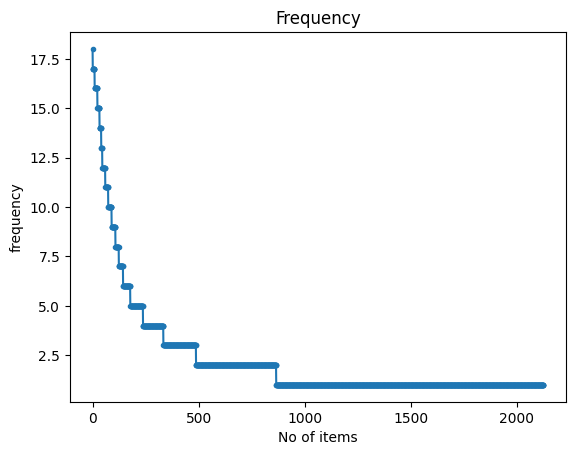

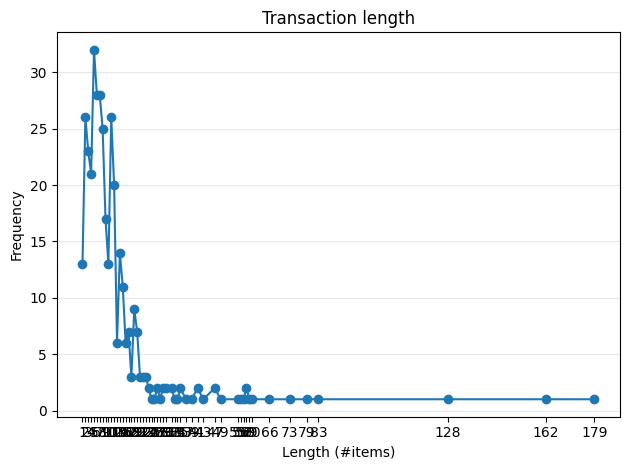

In [23]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj2 = tds.TransactionalDatabase('td_freq_db_0.csv')
obj2.run()
obj2.printStats()
obj2.plotGraphs()



In [24]:
#Mine and store the frequent patterns for label 0
obj2 = alg.FPGrowth(iFile='td_freq_db_0.csv', minSup=9)
obj2.mine()
frequentPatternsDF_0= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_0))) #print the total number of patterns
print('Runtime: ' + str(obj2.getRuntime())) #measure the runtime
obj2.save('freq_patterns_0.txt')
display(frequentPatternsDF_0)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 411
Runtime: 0.017704486846923828


,Patterns,Support
0,cash,9
1,high,9
2,said,9
3,got,9
4,always,9
...,...,...
406,court\tfederal\tsupreme\treserve,16
407,supreme\tcourt,17
408,supreme\tfederal,17
409,court\tsupreme\tfederal,17


Database size (total no of transactions) : 314
Number of items : 1720
Minimum Transaction Size : 1
Average Transaction Size : 14.82484076433121
Maximum Transaction Size : 134
Standard Deviation Transaction Size : 13.55871476187003
Variance in Transaction Sizes : 184.42609023015405
Sparsity : 0.9913809065323655


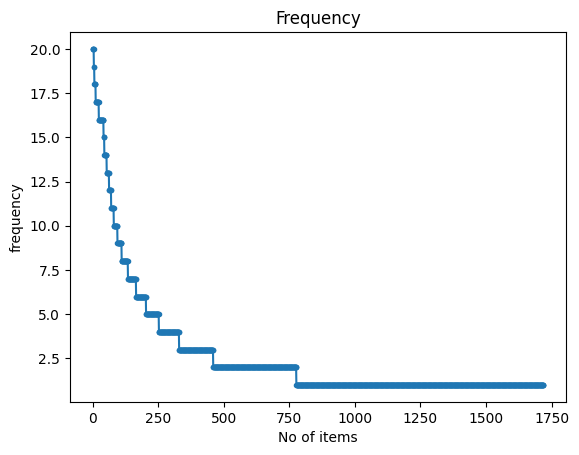

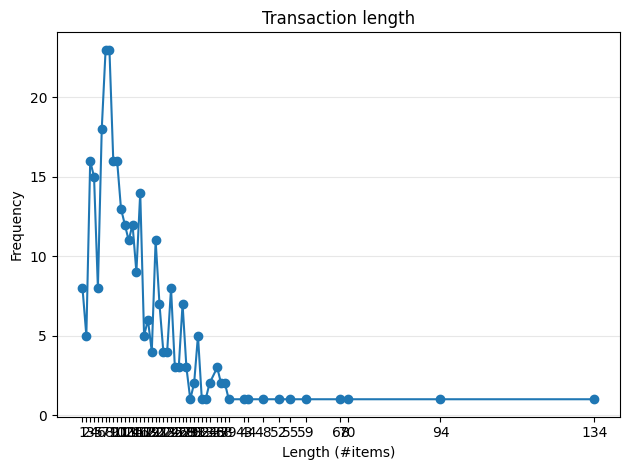

In [25]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj3 = tds.TransactionalDatabase('td_freq_db_-1.csv')
obj3.run()
obj3.printStats()
obj3.plotGraphs()



In [26]:
#Mine and store the frequent patterns for label -1
obj3 = alg.FPGrowth(iFile='td_freq_db_-1.csv', minSup=16)
obj3.mine()
frequentPatternsDF_n1= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_n1))) #print the total number of patterns
print('Runtime: ' + str(obj3.getRuntime())) #measure the runtime
obj3.save('freq_patterns_n1.txt')
display(frequentPatternsDF_n1)

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 1150
Runtime: 0.01126551628112793


,Patterns,Support
0,continues,16
1,continues\tyear,16
2,continues\ttreasury,16
3,year\tcontinues\ttreasury,16
4,led,16
...,...,...
1145,shows\tumping,20
1146,data\tot\tumping,20
1147,data\tshows\tumping,20
1148,ot\tshows\tumping,20


In [27]:
#Search for unique patterns across all labels

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_1, frequentPatternsDF_0, frequentPatternsDF_n1]

pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)


                     Patterns  Support
1540  data\tot\tshows\tumping       20
1539        ot\tshows\tumping       20
1538      data\tshows\tumping       20
1526                     data       20
1527                       ot       20
...                       ...      ...
38               after\tstock        5
28               really\twell        5
30             tariff\treally        5
1                      dollar        5
0                      please        5

[1541 rows x 2 columns]


In [28]:
# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
reddit_tdm = count_vect.fit_transform(reddit_dataset['text'])  
terms = count_vect.get_feature_names_out()  

# Tokenize the sentences into sets of unique words
reddit_dataset['tokenized_text'] = reddit_dataset['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=reddit_dataset.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_dataset['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(reddit_tdm.toarray(), columns=terms, index=reddit_dataset.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df[:5]

,00,000,01378,02,027,03,06,08,10,100,...,rate,quarterly\tportfolio,quarterly,rate\tportfolio,target,after\tstock,really\twell,tariff\treally,dollar,please
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 5.5 Dimensionality Reduction

In [29]:
#Reduce dimensionality using PCA

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=3).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=3).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=3).fit_transform(tdm_df.values)
# Apply PCA, t-SNE, and UMAP to the augmented data
X_pca_aug = PCA(n_components=3).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=3).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=3).fit_transform(augmented_df.values)

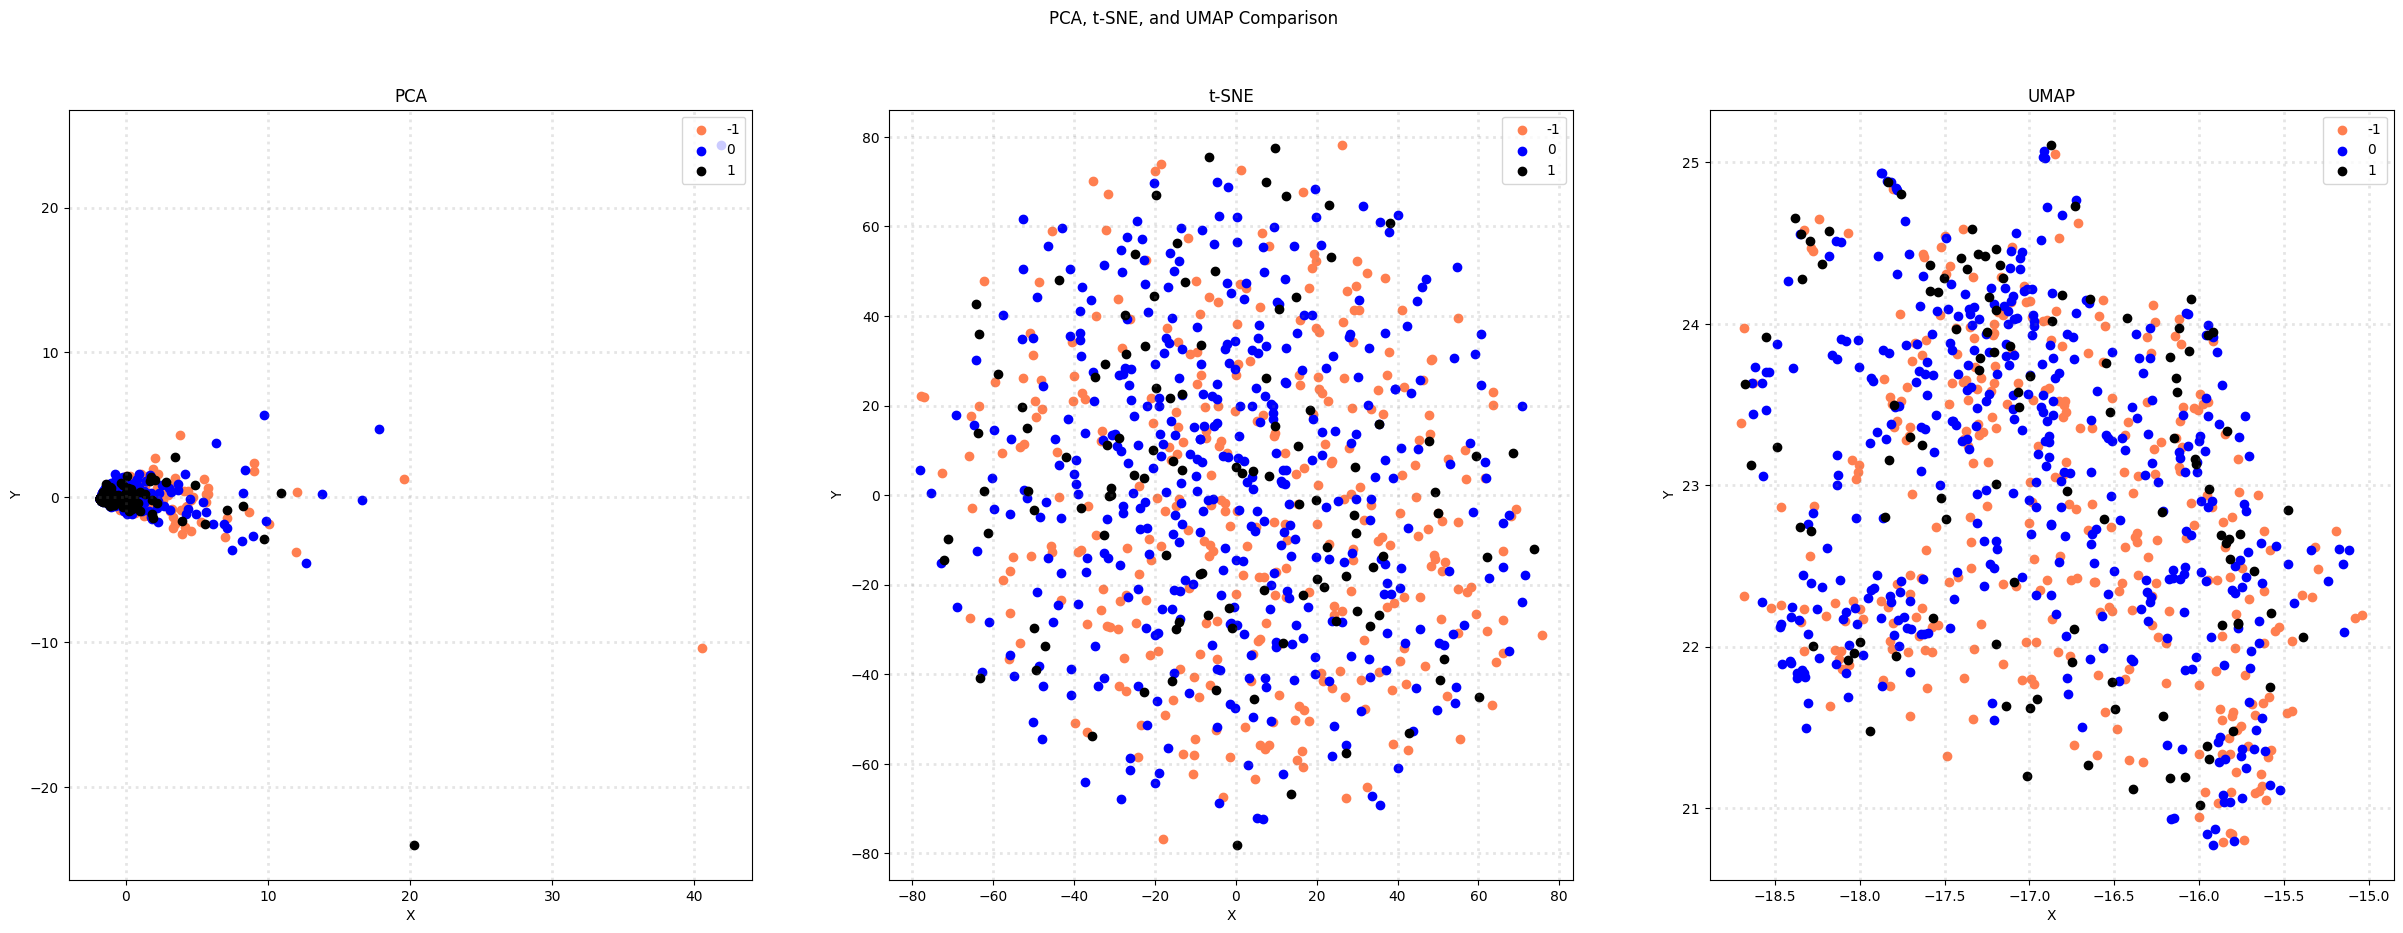

In [30]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = reddit_dataset['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[reddit_dataset['label'] == category].T[0]
        ys = X_reduced[reddit_dataset['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()


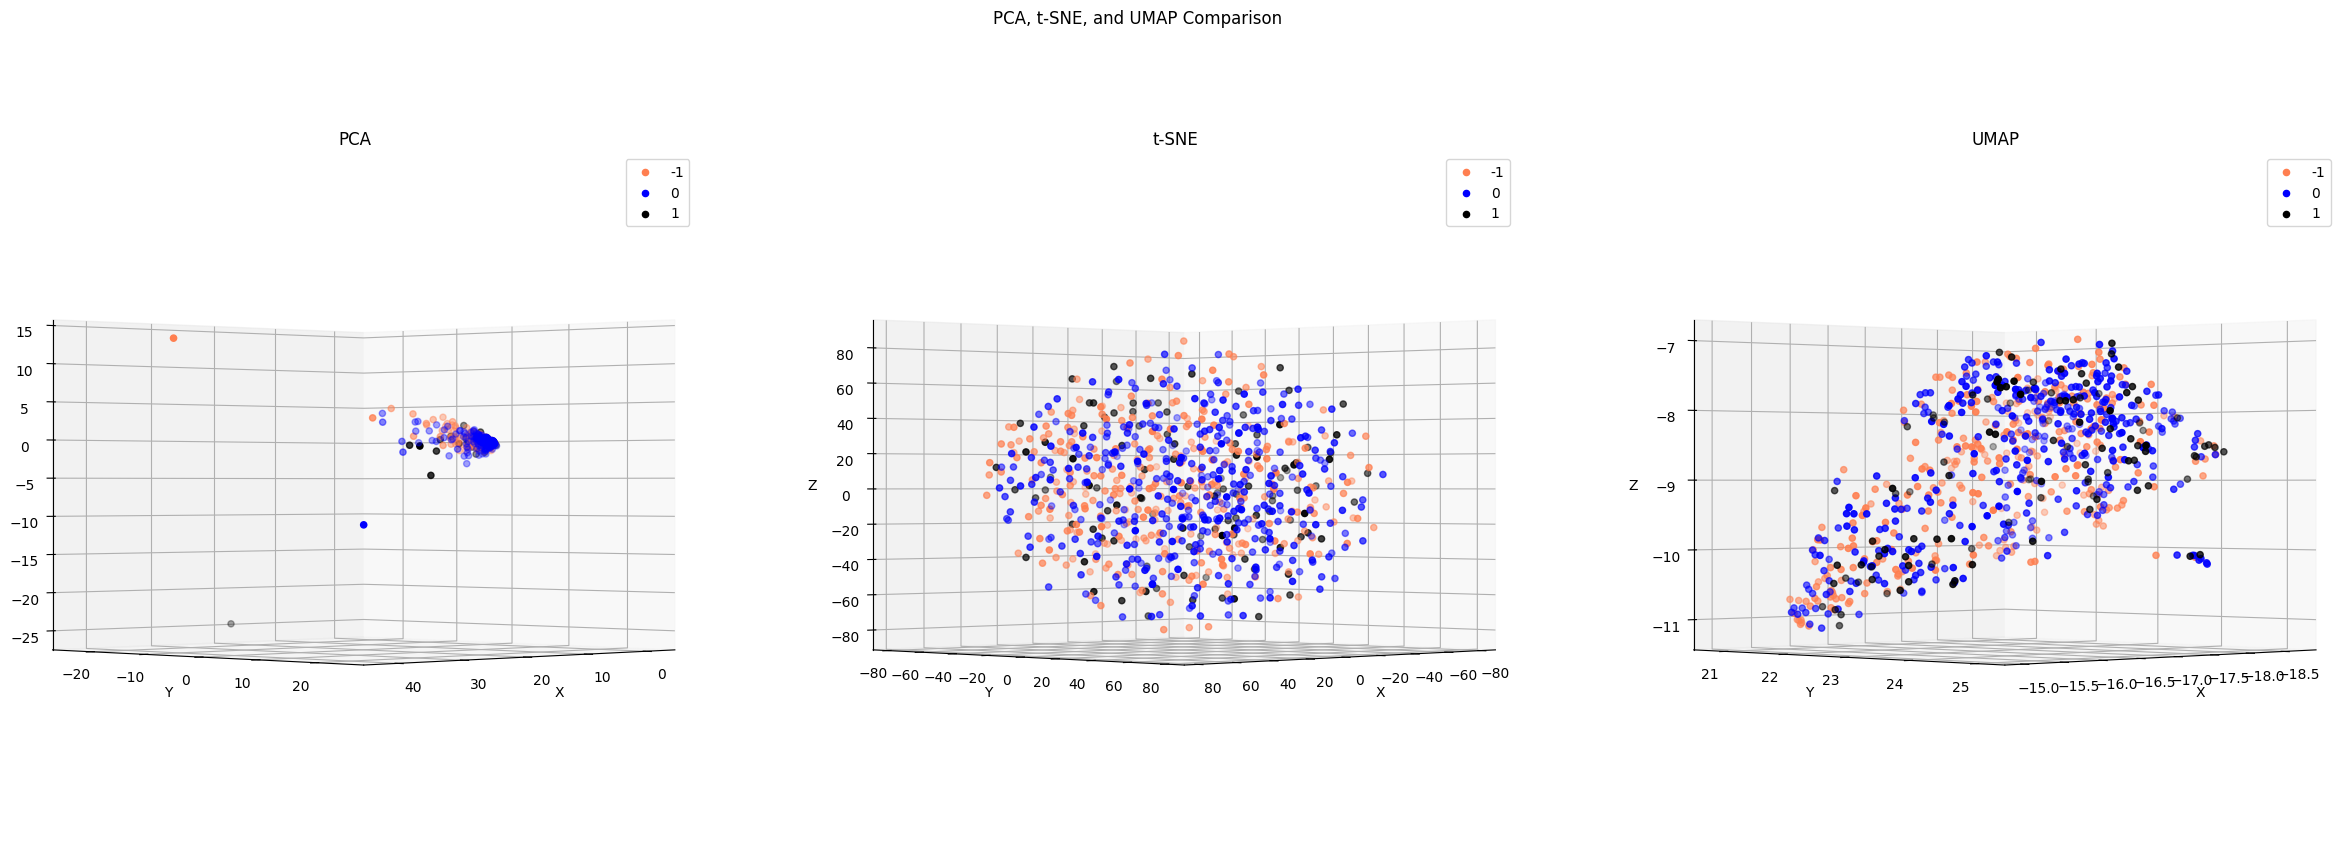

In [31]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = reddit_dataset['label'].unique() 

fig = plt.figure(figsize=(30,10))
axes = [fig.add_subplot(1,3,i+1, projection='3d') for i in range(3)]  # Create 3D subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title, elev=0, azim=45):
    for c, category in zip(col, categories):
        xs = X_reduced[reddit_dataset['label'] == category].T[0]
        ys = X_reduced[reddit_dataset['label'] == category].T[1]
        zs = X_reduced[reddit_dataset['label'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

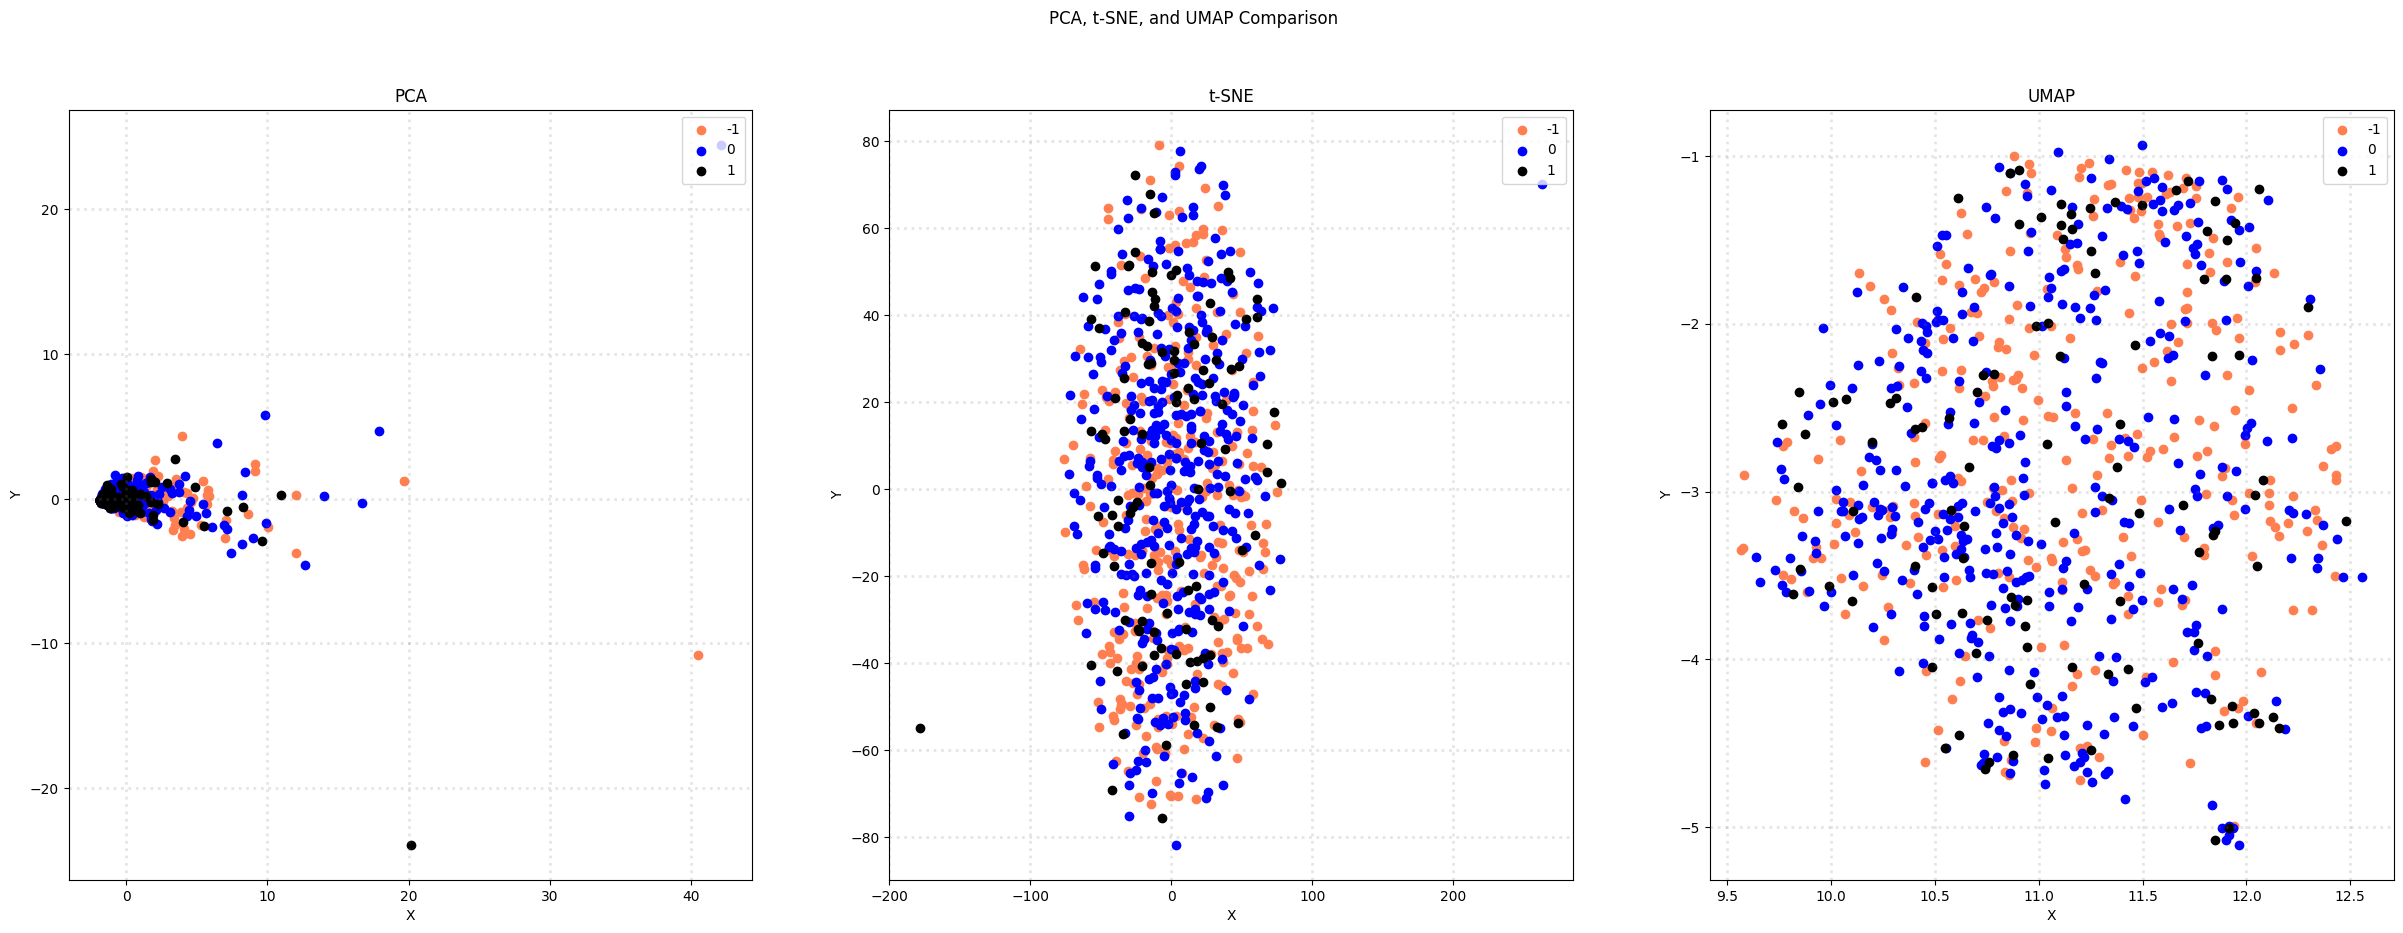

In [32]:
# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = reddit_dataset['label'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[reddit_dataset['label'] == category].T[0]
        ys = X_reduced[reddit_dataset['label'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

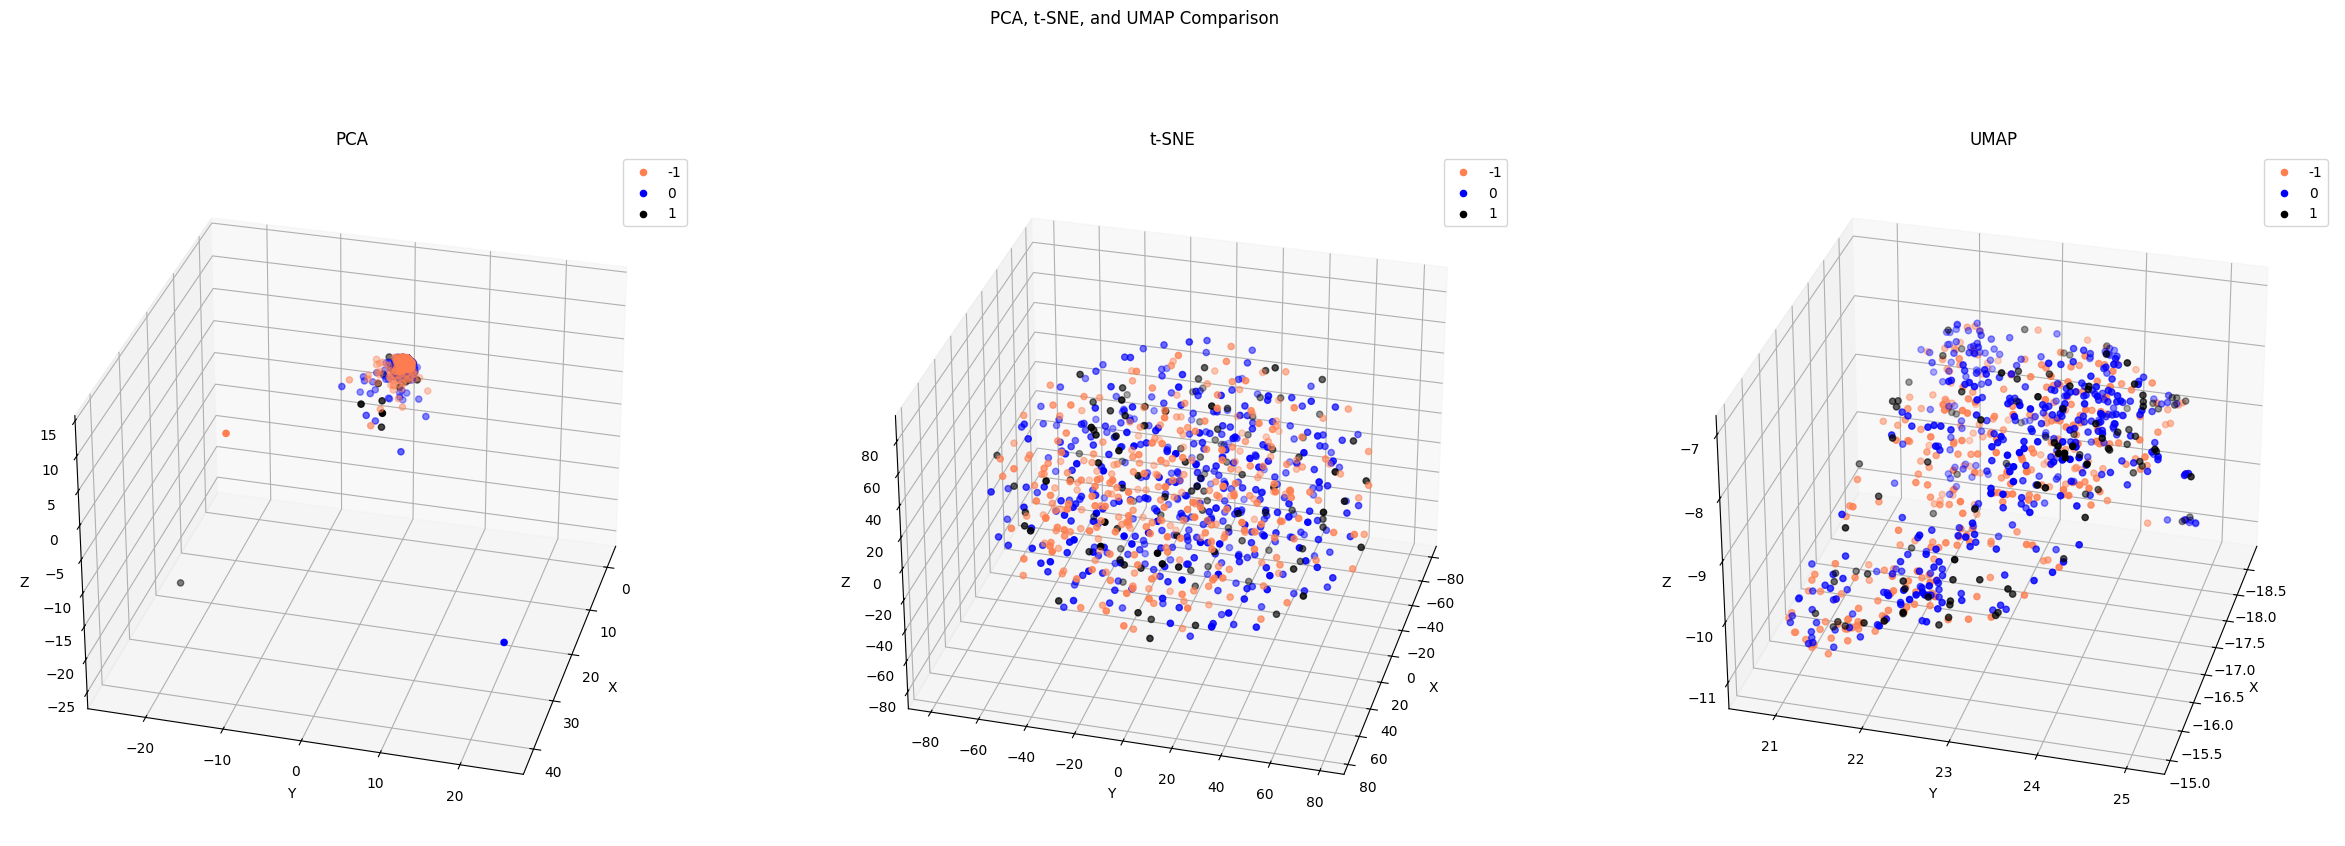

In [33]:
from mpl_toolkits.mplot3d import Axes3D

# Plot the results in subplots
col = ['coral', 'blue', 'black']
categories = reddit_dataset['label'].unique() 

fig = plt.figure(figsize=(30,10))
axes = [fig.add_subplot(1,3,i+1, projection='3d') for i in range(3)]  # Create 3D subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

def plot_scatter(ax, X_reduced, title, elev=30, azim=15):
    for c, category in zip(col, categories):
        xs = X_reduced[reddit_dataset['label'] == category].T[0]
        ys = X_reduced[reddit_dataset['label'] == category].T[1]
        zs = X_reduced[reddit_dataset['label'] == category].T[2]
        ax.scatter(xs, ys, zs, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.view_init(elev=elev, azim=azim)
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

### 5.6 Discretization and binarization

In [34]:
# Perform discretization and binarization

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.MultiLabelBinarizer()

mlb.fit(reddit_dataset['label'])

reddit_dataset['label_bin'] = mlb.transform(reddit_dataset['label']).tolist()

#Checkpoint: reddit_dataset['label_bin]
reddit_dataset['label_bin'][:5]

0    [1, 0, 1]
1    [0, 1, 0]
2    [0, 1, 0]
3    [0, 0, 1]
4    [1, 0, 1]
Name: label_bin, dtype: object

### 6. Data Exploration

In [35]:
# Compute cosine similarity

document_to_transform_1 = []
random_record_1 = reddit_dataset.iloc[100]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = reddit_dataset.iloc[200]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = reddit_dataset.iloc[700]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [36]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)


In [37]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_2_bin = cosine_similarity(document_vector_count_1_bin, document_vector_count_2_bin, dense_output=True)
cos_sim_count_2_3_bin = cosine_similarity(document_vector_count_2_bin, document_vector_count_3_bin, dense_output=True)


# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 2 in binary: %(x)f" %{"x":cos_sim_count_1_2_bin})
print("Cosine Similarity using count bw 1 and 3 in binary: %(x)f" %{"x":cos_sim_count_2_3_bin})

Cosine Similarity using count bw 1 and 2: 0.277350
Cosine Similarity using count bw 1 and 3: 0.186052
Cosine Similarity using count bw 1 and 2 in binary: 0.166667
Cosine Similarity using count bw 1 and 3 in binary: 0.074536


C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\3273569755.py:12: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\3273569755.py:13: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\3273569755.py:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

C:\Users\leoho\AppData\Local\Temp\ipykernel_27804\3273569755.py:16: DeprecationWarning:

Conversion of an array with ndim > 0 t

### 7. Data Classification: Naive Bayes

In [49]:
#Import for data classification using Naive Bayes classifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

# Remove top 5% and bottom 20% of words from the dataframes
tdm_df = filter_top_bottom_words_by_sum(tdm_df, 0.05, 0.2)
augmented_df = filter_top_bottom_words_by_sum(augmented_df, 0.05, 0.2)

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(tdm_df, reddit_dataset['label'], test_size=0.3, random_state=42)
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, reddit_dataset['label'], test_size=0.3, random_state=42)

Bottom 20.0% words: 
1870                 1
186                  1
1728                 1
1700                 1
17                   1
                    ..
shortly              1
shorting             1
shortexemptvolume    1
shortages            1
shops                1
Length: 647, dtype: int64
Top 5.0% words: 
hurt           8
during         8
talking        8
talk           8
massive        8
              ..
went          12
anyone        13
chinese       13
countries     13
everything    13
Length: 161, dtype: int64
Index(['1870', '186', '1728', '1700', '17', '160', '15m', '153', 'legit',
       'legislative',
       ...
       'great', 'else', 'plan', 'far', 'happening', 'went', 'anyone',
       'chinese', 'countries', 'everything'],
      dtype='object', length=808)
Bottom 20.0% words: 
advisors\tbunch                      0
economic\tadvisors\tbunch            0
launch\tadvisors\tbunch              0
sun\tadvisors\tbunch                 0
economic\tlaunch\tadvisors\tbunch   

In [50]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Naive Bayes Classifier on Original TDM")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Naive Bayes Classifier on Original TDM
Accuracy: 0.522633744855967

Classification Report:
               precision    recall  f1-score   support

          -1     0.5000    0.5333    0.5161        90
           0     0.5952    0.6048    0.6000       124
           1     0.1905    0.1379    0.1600        29

    accuracy                         0.5226       243
   macro avg     0.4286    0.4254    0.4254       243
weighted avg     0.5117    0.5226    0.5164       243



In [51]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_aug_train, y_aug_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_aug_test)

# Evaluate the classifier
print("Naive Bayes Classifier on Augmented TDM")
print("Accuracy:", accuracy_score(y_aug_test, y_pred))
print("\nClassification Report:\n", classification_report(y_aug_test, y_pred, digits=4))

Naive Bayes Classifier on Augmented TDM
Accuracy: 0.49382716049382713

Classification Report:
               precision    recall  f1-score   support

          -1     0.4831    0.4778    0.4804        90
           0     0.5703    0.5887    0.5794       124
           1     0.1538    0.1379    0.1455        29

    accuracy                         0.4938       243
   macro avg     0.4024    0.4015    0.4018       243
weighted avg     0.4883    0.4938    0.4909       243



### 7. Data Classification: Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = dt_classifier.predict(X_test)
print("Decision Tree Classifier on Original TDM")
print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, digits=4))

Decision Tree Classifier on Original TDM
Decision Tree Accuracy (TDM): 0.5020576131687243

Classification Report:
               precision    recall  f1-score   support

          -1     0.5517    0.3556    0.4324        90
           0     0.5399    0.7097    0.6132       124
           1     0.0909    0.0690    0.0784        29

    accuracy                         0.5021       243
   macro avg     0.3942    0.3781    0.3747       243
weighted avg     0.4907    0.5021    0.4824       243



In [53]:
# Train the Decision Tree classifier
df_classifier = DecisionTreeClassifier()
df_classifier.fit(X_aug_train, y_aug_train)

# Make predictions on the test set
y_pred_dt = df_classifier.predict(X_aug_test)

# Evaluate the classifier
print("Decision Tree Classifier on Augmented TDM")
print("Accuracy:", accuracy_score(y_aug_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_aug_test, y_pred_dt, digits=4))

Decision Tree Classifier on Augmented TDM
Accuracy: 0.5390946502057613

Classification Report:
               precision    recall  f1-score   support

          -1     0.5625    0.3000    0.3913        90
           0     0.5562    0.7984    0.6556       124
           1     0.2941    0.1724    0.2174        29

    accuracy                         0.5391       243
   macro avg     0.4709    0.4236    0.4214       243
weighted avg     0.5272    0.5391    0.5054       243



### Lab1 Phase 2: Using TF-IDF with Naive Bayes Classfier

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert 'text' column into term-document matrix using TfidfVectorizer()
tfidf_vect = TfidfVectorizer()
reddit_tfidf = tfidf_vect.fit_transform(reddit_dataset['text'])  # X['text'] contains your text data
terms = tfidf_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
reddit_dataset['tokenized_text'] = reddit_dataset['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=reddit_dataset.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = reddit_dataset['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the TF-IDF matrix to a DataFrame for easy merging
tfidf_df = pd.DataFrame(reddit_tfidf.toarray(), columns=terms, index=reddit_dataset.index)

# Concatenate the original TF-IDF and the pattern matrix to augment the features
augmented_tfidf_df = pd.concat([tfidf_df, pattern_matrix], axis=1)

In [55]:
tfidf_df[:5]

,00,000,01378,02,027,03,06,08,10,100,...,yours,yourself,yourselves,youtube,yoyo,yup,zero,zgld,zone,zsil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Split the data into training and testing sets (70% train, 30% test)

X_train, X_test, y_train, y_test = train_test_split(tfidf_df, reddit_dataset['label'], test_size=0.3, random_state=42)

In [57]:
from sklearn.naive_bayes import MultinomialNB

# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.654320987654321

Classification Report:
               precision    recall  f1-score   support

          -1     0.5983    0.7778    0.6763        90
           0     0.7063    0.7177    0.7120       124
           1     0.0000    0.0000    0.0000        29

    accuracy                         0.6543       243
   macro avg     0.4349    0.4985    0.4628       243
weighted avg     0.5820    0.6543    0.6138       243



c:\Users\leoho\Desktop\Datamine\DM2025labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\leoho\Desktop\Datamine\DM2025labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\leoho\Desktop\Datamine\DM2025labs\DM2025-Lab1-Exercise\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [58]:
# Split the data into training and testing sets using augmented dataframe (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(augmented_tfidf_df, reddit_dataset['label'], test_size=0.3, random_state=42)

In [59]:
# Train the Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb_classifier.predict(X_test)

# Evaluate the classifier
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))

Accuracy: 0.5720164609053497

Classification Report:
               precision    recall  f1-score   support

          -1     0.5154    0.7444    0.6091        90
           0     0.6429    0.5806    0.6102       124
           1     0.0000    0.0000    0.0000        29

    accuracy                         0.5720       243
   macro avg     0.3861    0.4417    0.4064       243
weighted avg     0.5189    0.5720    0.5370       243

